In [1]:
import gym
import gym_oscillator
import oscillator_cpp
from stable_baselines.common import set_global_seeds

from stable_baselines.common.policies import MlpPolicy,MlpLnLstmPolicy,FeedForwardPolicy
from stable_baselines.common.vec_env import DummyVecEnv,SubprocVecEnv,VecNormalize, VecEnv
from stable_baselines import PPO2
from stable_baselines.common.vec_env import VecEnv

import numpy as np
from matplotlib import pyplot as plt



/home/dmitriy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dmitriy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dmitriy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dmitriy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [2]:
def make_env(env_id, rank, seed=0,s1=False,s2=False,s3=False,s4=False,s5=False):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :param s_i: (bool) reward form, only one can be true
    """
    def _init():
        
        env = gym.make(env_id)
        env = DummyVecEnv([make_env_dumb(env_id,1)])
        model = PPO2(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
        model =model.load('trained_models/Ps6_final_3')
        
        env = gym.make(env_id)
        env.__init__(model=model)
        
        
        return env
    set_global_seeds(seed)
    return _init

def make_env_dumb(env_id, rank, seed=0,s1=False,s2=False,s3=False,s4=False,s5=False):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :param s_i: (bool) reward form, only one can be true
    """
    def _init():
        
        env = gym.make(env_id)
        env.__init__(model=None)
        
        
        return env
    return _init

In [3]:
#Our env
env_id = 'oscillator-v0'
time_steps = int(10e6)
#Number of cpus
num_cpu = 4
env = SubprocVecEnv([make_env(env_id, i,s2=True) for i in range(num_cpu)])

model = PPO2(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")



Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.flatten instead.WARNING:tensorflow:From /home/dmitriy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.WARNING:tensorflow:From /home/dmitriy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Colocations handled automatically by placer

In [4]:
# model.learn(time_steps)

In [5]:
# model.save('trained_models/double_extra.tf')

In [12]:
#env.reset()
coupling_power = 0.02
num_cpu = 4
model = model.load('trained_models/Ps6_final_3')
model2 = model.load('trained_models/double.tf')
env = gym.make('oscillator-v0',)
env.__init__(epsilon=coupling_power,model=model,initial_steps=5000,model_steps=5000)
print(env.model)
rews_ = []
obs_ = []
ss_y = env.y_state
obs = env.reset()
acs_ = []
states_x = []
states_y = []


for i in range(20000):
    action, _states = model2.predict(obs)
   
    obs, rewards, dones, info = env.step(action)
   
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(action)
    rews_.append(rewards)

#Final relaxation
for i in range(5000):
    obs, rewards, dones, info = env.step([0])
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(0)
    rews_.append(rewards)


Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


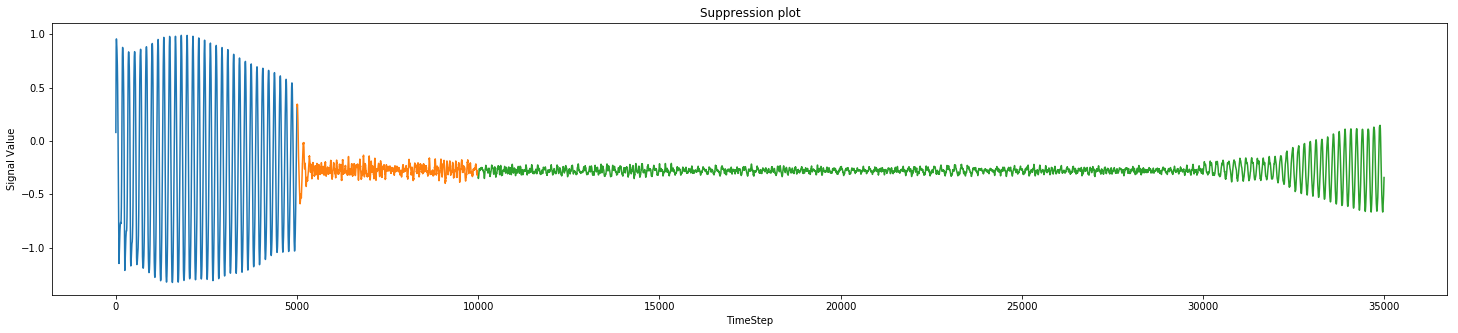

In [13]:
plt.figure(figsize=(25,5))
plt.title('Suppression plot')
plt.xlabel('TimeStep')
plt.ylabel('Signal Value')
plt.plot()
initial_steps = 5000
model_steps = 5000
im = initial_steps+model_steps
plt.plot(np.arange(len(env.x_states[:initial_steps])),env.x_states[:initial_steps])
plt.plot(np.arange(len(env.x_states[initial_steps:im]))+initial_steps,env.x_states[initial_steps:im])
plt.plot(np.arange(len(env.x_states[im:]))+im,env.x_states[im:])
#plt.plot(env.acs_)

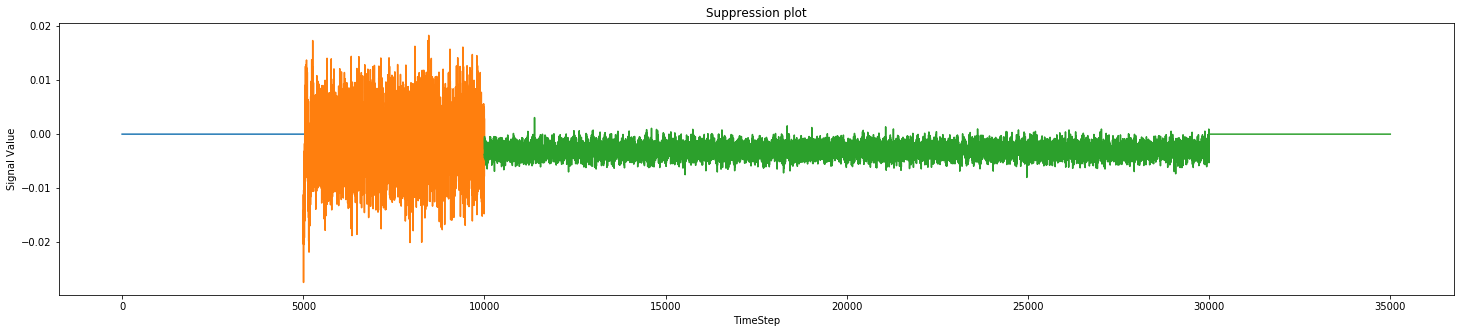

In [14]:
plt.figure(figsize=(25,5))
plt.title('Suppression plot')
plt.xlabel('TimeStep')
plt.ylabel('Signal Value')
plt.plot()
initial_steps = 5000
model_steps = 5000
im = initial_steps+model_steps
plt.plot(np.arange(len(env.actions[:initial_steps])),env.actions[:initial_steps])
plt.plot(np.arange(len(env.actions[initial_steps:im]))+initial_steps,env.actions[initial_steps:im])
plt.plot(np.arange(len(env.actions[im:]))+im,env.actions[im:])
#plt.plot(env.acs_)

In [15]:
import pandas as pd
def output_to_csv(states,actions,name='35k_double_chaos.xls'):
    print(len(states),len(actions))
    output = pd.DataFrame([
    states,actions]).T
    output.columns=['States_X','Actions']
    output.to_excel(name)
    return True

In [16]:
output_to_csv(env.x_states,env.actions)

35000 35000


True

In [9]:
len(env.x_states),len(env.actions)

(35000, 35000)

In [ ]:
neurons_output_results = pd.DataFrame([
    means_before_all_neurons,
means_after_all_neurons,
    stds_before_all_neurons,
stds_after_all_neurons,[100,1000,2000,5000,10000]
]).T
neurons_output_results.columns=['Means_before','Means After','StdsBefore','StdsAfter','NeuronsNumber']

In [ ]:
np.std(env.x_states[initial_steps:im])

In [ ]:
np.std(env.x_states[im:55000])

In [ ]:
q = np.std(env.x_states[:initial_steps])/np.std(env.x_states[initial_steps+5000:im])
print(np.sqrt(q))

In [ ]:
l = np.std(env.x_states[:initial_steps])/np.std(env.x_states[im:im+20000])
print(np.sqrt(l))

In [ ]:
l/q

In [ ]:
im+55000

In [20]:
print(np.std(env.x_states[:2500])/np.std(env.x_states[2500:12500]))

1.8088880554873588
